# task3 & task4
C(x=0) = 1

dC/dt(x=-1) = 0


compute C with implicit scheme and apply BCs

task 3: analyse stability + compare with task 1

task 4: analyse accuracy + compare with task 2

In [1]:
# import sympy
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#https://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
def TDMAsolve(A, b):
    Ac = A.copy()
    bc = b.copy()
    n = A.shape[0]
    x = numpy.zeros(n)

    #eliminate lower diagonal
    for k in range(1, n):
        m = Ac[k,k-1]/Ac[k-1,k-1]
        Ac[k,k] = Ac[k,k] - m*Ac[k-1,k]
        bc[k] = bc[k] - m*bc[k-1]
        #Ac[k,k-1] = 0 #not necessary

    #reverse substitution
    x[n-1] = bc[n-1]/Ac[n-1,n-1]
    k=n-2
    for i in range(0, n-1):
        x[k] = (bc[k]-Ac[k,k+1]*x[k+1])/Ac[k,k]
        k=k-1

    return x

In [4]:
#settings of time and space
xmax = 50
tmax = 200
dx = 1/xmax
dt = 0.005
D = 10**(-6)
D = 0.1 #################################################
dirichlet = 1 #at x=0
neuman = 0 #at x=-1

#initialization
space = np.linspace(0,xmax,xmax)
time = np.linspace(0,tmax,tmax)
S = dt/(dx*dx)
#C = numpy.zeros([tmax,xmax]) #concentration values
C = []
A = numpy.zeros([xmax,xmax]) #discretisation matrix
C_0 = numpy.zeros([xmax]) #concentration vector at given time step

#fill matrix
def fill_matrix(matrix, dimension):
    for i in range(dimension):
        matrix[i,i] = 1+2*S*D
    for i in range(dimension-1):
        matrix[i+1,i] = -S*D
    for i in range(dimension-1):
        matrix[i,i+1] = -S*D

#apply BC to concentration vector
def apply_BC(C_vector):
    C_vector[0] = 1 
    C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_vector[-2])
    return C_vector

#solve
fill_matrix(A,xmax)
C_0 = apply_BC(C_0)
C_old = C_0

for i in range(tmax):
    #C_new = np.linalg.solve(A,C_old) #compute next C vector
    C_new = TDMAsolve(A,C_old)
    C_new = apply_BC(C_new) 
    #C[i] = C_new #store in C matrix
    C.append(C_new)
    
    C_old = C_new #set old C vector to new for next iteration

C = np.array(C)

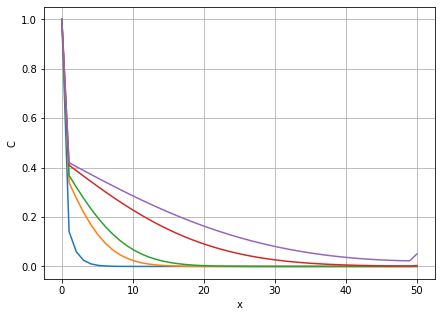

In [5]:
plottimesteps = [0,1,2,3,4,5]
plottimesteps = [0,50,100,149,400,600,999]
plottimesteps = [0,10,20,100,199]

fig = plt.figure(figsize = (7,5))

#for i in range(tmax):
for i in plottimesteps:
    plt.plot(space,C[i,:],label="C")
    #plt.plot(space,C[i,:],label="C at t="+str(i))

# plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
plt.show()
#plt.savefig('plots/asdfasdfasdfasdf.pdf')

In [ ]:
A = numpy.array([[1,2,0],
                 [4,5,6],
                 [0,8,9]],dtype=numpy.float32)
b = numpy.array([[1],
                 [2],
                 [8]],dtype=numpy.float32)

M = numpy.array([[1,2,0,0],
                 [4,5,6,0],
                 [0,8,9,0],
                 [0,0,4,6]],dtype=numpy.float32)
v = numpy.array([[1],
                 [2],
                 [8],
                 [8]],dtype=numpy.float32)

#print(numpy.linalg.solve(M,v))
#print(TDMAsolve(M,v))